In [1]:
import pandas as pd
import json
import holidays
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
with open('data-sample.json') as f:
    data = json.load(f)
df = pd.json_normalize(data)

In [3]:
print(len(df))

8334


In [4]:
df.head()

,taskCreatedTime,taskAssignedTo,taskCompletedTime,taskStatus,flow,taskId,taskLocationDone.lon,taskLocationDone.lat,cod.amount,cod.received,UserVar.branch_dest,UserVar.taskStatusLabel,UserVar.receiver_city,UserVar.taskDetailStatusLabel,UserVar.taskDetailStatus,UserVar.weight,UserVar.branch_origin,UserVar.taskStatus
0,2022-11-01 20:17:26 +0700,pacifiedLion0,2022-11-01 20:46:30 +0700,done,Delivery,4fe3b237c832ca4841a2,109.762910,-6.926608,685000.0,True,SRG,Success,"BATANG ,KAB BATANG",YANG BERSANGKUTAN,D01,13,CGK,COLF01
1,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 12:33:48 +0700,done,Delivery,08a4da25256affae8446,110.033986,-7.876154,53500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,1.3,CGK,COLF01
2,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 13:41:57 +0700,done,Delivery,2ff0dc469826158b7684,109.999733,-7.849777,179500.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01
3,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 18:18:19 +0700,done,Delivery,331c172c2b383f774328,110.003708,-7.710998,31815.0,True,MGL,Success,"PURWODADI,PURWOREJO",YANG BERSANGKUTAN,D01,0.625,CGK,COLF01
4,2022-11-01 08:41:07 +0700,peacefulTacos6,2022-11-01 10:51:49 +0700,done,Delivery,a9d53fa96c80baee8b23,110.013887,-7.829742,144562.0,True,MGL,Success,"BAGELEN,PURWOREJO",YANG BERSANGKUTAN,D01,3,CGK,COLF01


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8334 entries, 0 to 8333
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   taskCreatedTime                8334 non-null   object 
 1   taskAssignedTo                 8333 non-null   object 
 2   taskCompletedTime              7566 non-null   object 
 3   taskStatus                     8334 non-null   object 
 4   flow                           8334 non-null   object 
 5   taskId                         8334 non-null   object 
 6   taskLocationDone.lon           7566 non-null   float64
 7   taskLocationDone.lat           7566 non-null   float64
 8   cod.amount                     2358 non-null   float64
 9   cod.received                   2358 non-null   object 
 10  UserVar.branch_dest            8334 non-null   object 
 11  UserVar.taskStatusLabel        7572 non-null   object 
 12  UserVar.receiver_city          8282 non-null   o

In [6]:
df['UserVar.taskStatusLabel'].isna().sum()

762

In [7]:
df = df[df['UserVar.taskStatusLabel'].notna()]

In [8]:
len(df['taskAssignedTo'].unique())

2730

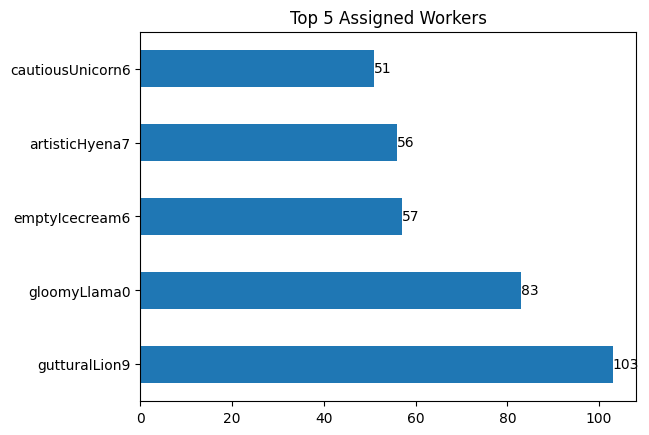

In [9]:
ax = df['taskAssignedTo'].value_counts()[:5].sort_values(ascending=False).plot(kind='barh', title='Top 5 Assigned Workers')
for c in ax.containers:     
    ax.bar_label(c, label_type='edge')

In [10]:
len(df['UserVar.branch_dest'].unique())

62

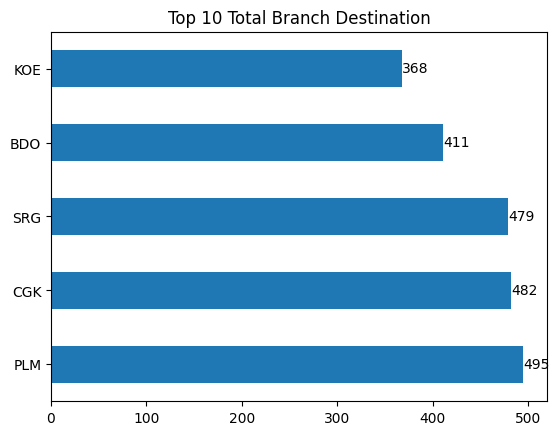

In [11]:
ax = df['UserVar.branch_dest'].value_counts()[:5].sort_values(ascending=False).plot(kind='barh', title="Top 10 Total Branch Destination")
for c in ax.containers:     
    ax.bar_label(c, label_type='edge')

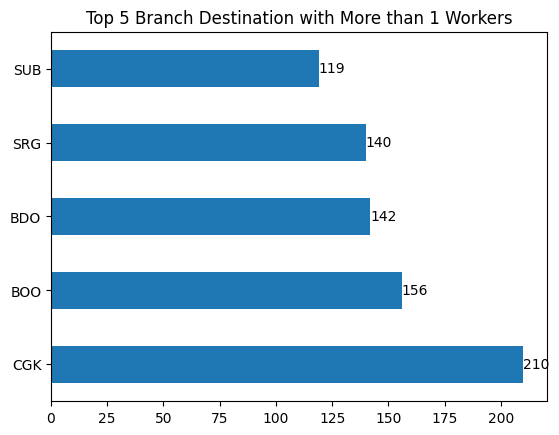

In [12]:
top_branch_dest = df.copy()
top_branch_dest = top_branch_dest[['taskAssignedTo', 'UserVar.branch_dest']].drop_duplicates()
ax = top_branch_dest['UserVar.branch_dest'].value_counts()[:5].sort_values(ascending=False).plot(kind='barh', title='Top 5 Branch Destination with More than 1 Workers')
for c in ax.containers:     
    ax.bar_label(c, label_type='edge')

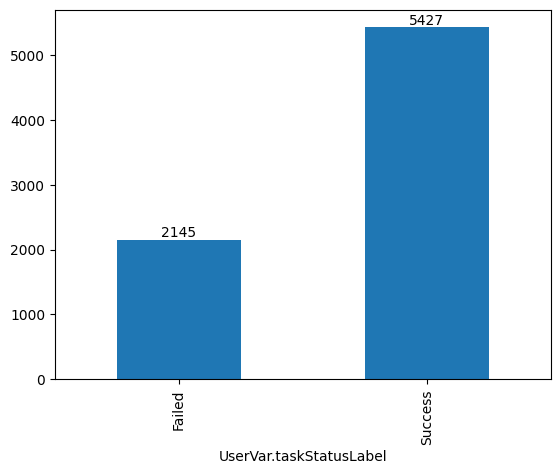

In [13]:
ax = df.groupby('UserVar.taskStatusLabel').size().plot(kind='bar')
for c in ax.containers:     
    ax.bar_label(c, label_type='edge')

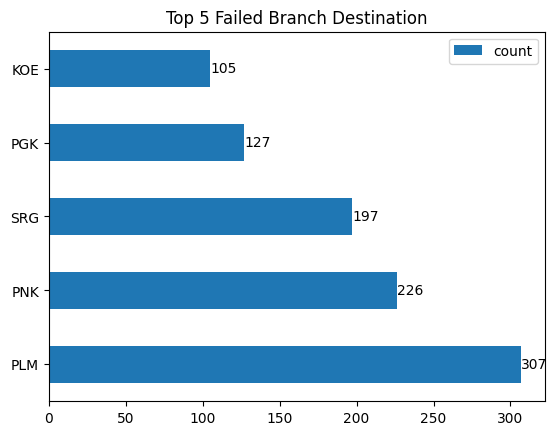

In [41]:
ax = df.loc[df['UserVar.taskStatusLabel'] == 'Failed'].groupby("UserVar.branch_dest").size().reset_index(name='count').sort_values('count', ascending=False).head(5).plot.barh('UserVar.branch_dest', 'count', ylabel='', title='Top 5 Failed Branch Destination')
for c in ax.containers:     
    ax.bar_label(c, label_type='edge')

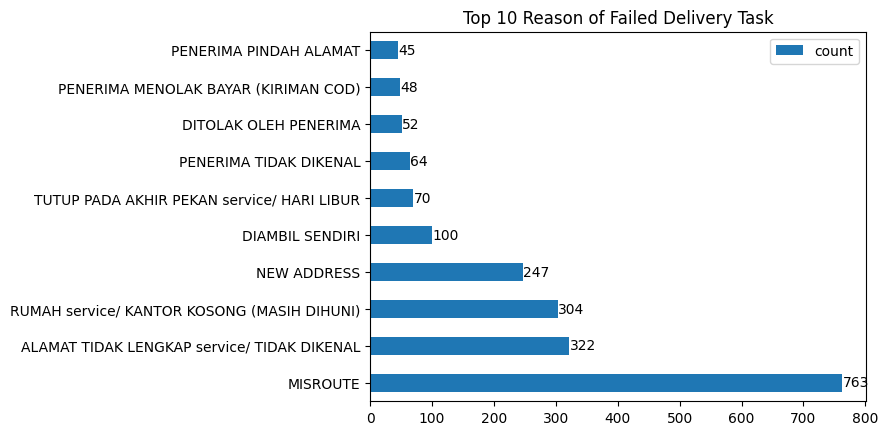

In [55]:
ax = df.loc[df['UserVar.taskStatusLabel'] == 'Failed'].groupby("UserVar.taskDetailStatusLabel").size().reset_index(name='count').sort_values('count', ascending=False).head(10).plot.barh('UserVar.taskDetailStatusLabel', 'count', ylabel='', title='Top 10 Reason of Failed Delivery Task')
for c in ax.containers:     
    ax.bar_label(c, label_type='edge')

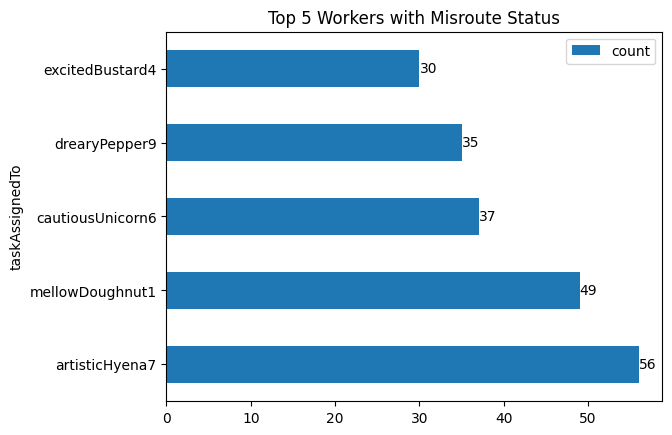

In [15]:
ax = df.loc[df['UserVar.taskDetailStatusLabel'] == 'MISROUTE'].groupby("taskAssignedTo").size().reset_index(name='count').sort_values('count', ascending=False).head(5).plot.barh('taskAssignedTo', 'count', title='Top 5 Workers with Misroute Status')
for c in ax.containers:     
    ax.bar_label(c, label_type='edge')

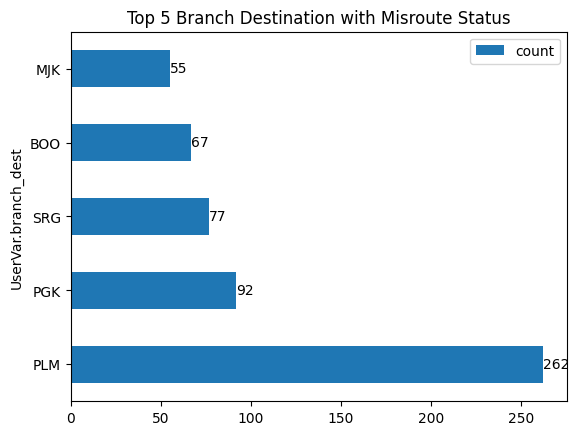

In [16]:
ax = df.loc[df['UserVar.taskDetailStatusLabel'] == 'MISROUTE'].groupby("UserVar.branch_dest").size().reset_index(name='count').sort_values('count', ascending=False).head(5).plot.barh('UserVar.branch_dest', 'count', title='Top 5 Branch Destination with Misroute Status')
for c in ax.containers:     
    ax.bar_label(c, label_type='edge')

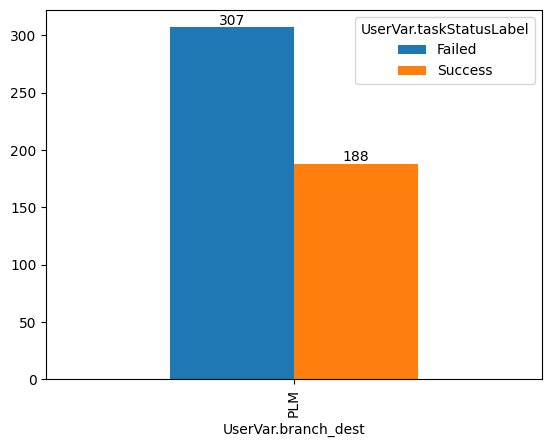

In [17]:
ax = pd.crosstab(df['UserVar.branch_dest'].loc[df['UserVar.branch_dest'] == 'PLM'],df['UserVar.taskStatusLabel']).plot.bar()
for c in ax.containers:     
    ax.bar_label(c, label_type='edge')

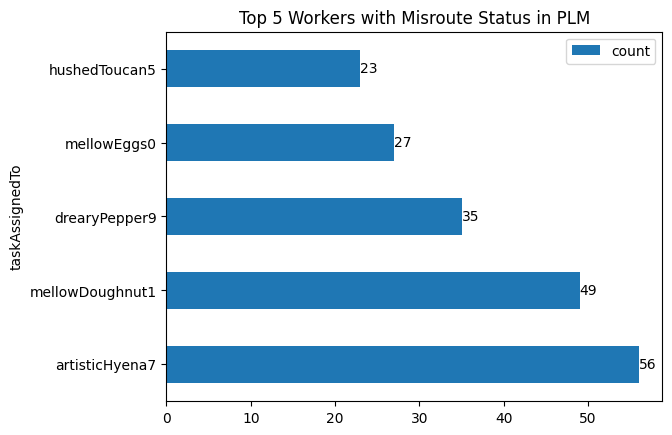

In [18]:
ax = df.loc[(df['UserVar.taskDetailStatusLabel'] == 'MISROUTE') & (df['UserVar.branch_dest'] == 'PLM')].groupby("taskAssignedTo").size().reset_index(name='count').sort_values('count', ascending=False).head(5).plot.barh('taskAssignedTo', 'count', title='Top 5 Workers with Misroute Status in PLM')
for c in ax.containers:     
    ax.bar_label(c, label_type='edge')

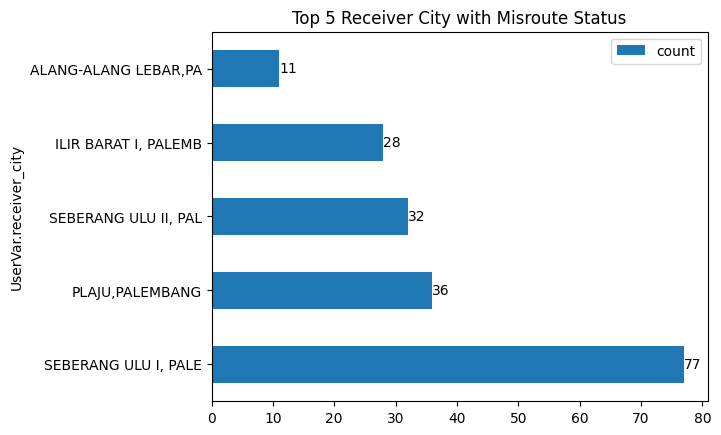

In [49]:
ax = df.loc[(df['UserVar.taskDetailStatusLabel'] == 'MISROUTE') & (df['UserVar.branch_dest'] == 'PLM')].groupby(["UserVar.receiver_city"]).size().reset_index(name='count').sort_values('count', ascending=False).head(5).plot.barh('UserVar.receiver_city', 'count', title='Top 5 Receiver City with Misroute Status')
for c in ax.containers:     
    ax.bar_label(c, label_type='edge')

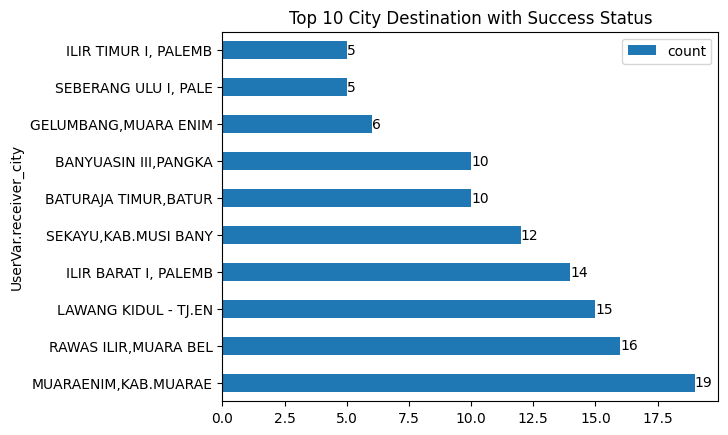

In [45]:
ax = df.loc[(df['UserVar.taskStatusLabel'] == 'Success') & (df['UserVar.branch_dest'] == 'PLM')].groupby("UserVar.receiver_city").size().reset_index(name='count').sort_values('count', ascending=False).head(10).plot.barh('UserVar.receiver_city', 'count', title='Top 10 City Destination with Success Status')
for c in ax.containers:     
    ax.bar_label(c, label_type='edge')

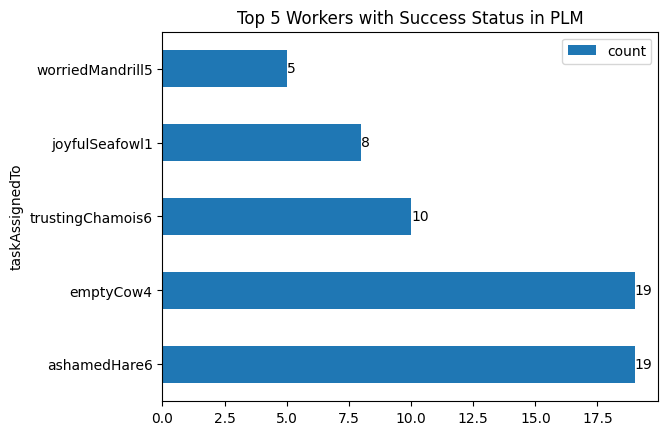

In [21]:
ax = df.loc[(df['UserVar.taskStatusLabel'] == 'Success') & (df['UserVar.branch_dest'] == 'PLM')].groupby("taskAssignedTo").size().reset_index(name='count').sort_values('count', ascending=False).head(5).plot.barh('taskAssignedTo', 'count', title='Top 5 Workers with Success Status in PLM')
for c in ax.containers:     
    ax.bar_label(c, label_type='edge') 

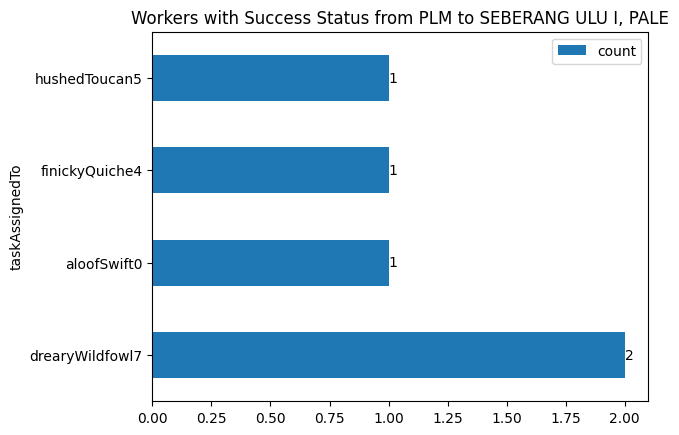

In [53]:
ax = df.loc[(df['UserVar.taskStatusLabel'] == 'Success') & (df['UserVar.receiver_city'] == 'SEBERANG ULU I, PALE')].groupby("taskAssignedTo").size().reset_index(name='count').sort_values('count', ascending=False).plot.barh('taskAssignedTo', 'count', title='Workers with Success Status from PLM to SEBERANG ULU I, PALE')
for c in ax.containers:     
    ax.bar_label(c, label_type='edge') 

In [22]:
df['taskCreatedTime'] = df['taskCreatedTime'].str.rsplit(' ', 1).str.get(0)
df['taskCreatedTime'] =  pd.to_datetime(df['taskCreatedTime'])
df['taskCompletedTime'] = df['taskCompletedTime'].str.rsplit(' ', 1).str.get(0)
df['taskCompletedTime'] =  pd.to_datetime(df['taskCompletedTime'])
df['taskDurationMinutes'] = df['taskCompletedTime'] - df['taskCreatedTime'] 
df = df[df['taskDurationMinutes'].notna()]

<ipython-input-22-33ec94c8a986>:1: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df['taskCreatedTime'] = df['taskCreatedTime'].str.rsplit(' ', 1).str.get(0)
<ipython-input-22-33ec94c8a986>:3: FutureWarning: In a future version of pandas all arguments of StringMethods.rsplit except for the argument 'pat' will be keyword-only.
  df['taskCompletedTime'] = df['taskCompletedTime'].str.rsplit(' ', 1).str.get(0)


<ipython-input-23-f41944e98024>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['taskCreatedTime_day'] = df['taskCreatedTime'].dt.day_name()


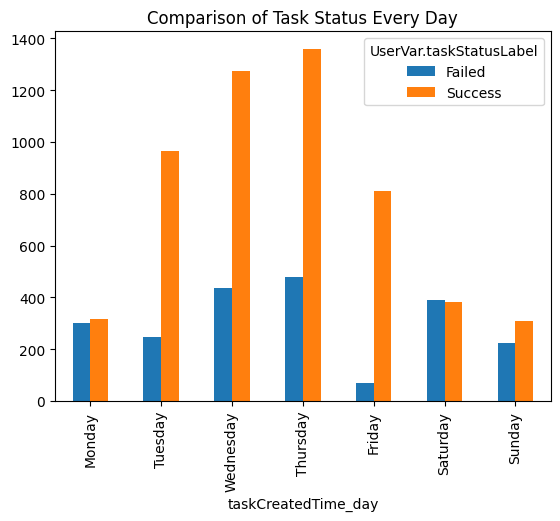

In [23]:
df['taskCreatedTime_day'] = df['taskCreatedTime'].dt.day_name()
ax = pd.crosstab(df['taskCreatedTime_day'],df['UserVar.taskStatusLabel']).reindex(['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']).plot.bar(title='Comparison of Task Status Every Day')

In [24]:
holiday = []
for index, row in df.iterrows():
  weekday = row['taskCreatedTime_day']
  date = row['taskCreatedTime']
  if weekday in ['Saturday','Sunday'] or date in holidays.Indonesia(years=2022):
    holiday.append('Holiday')
  else:
    holiday.append('Not Holiday')
df['holiday'] = holiday

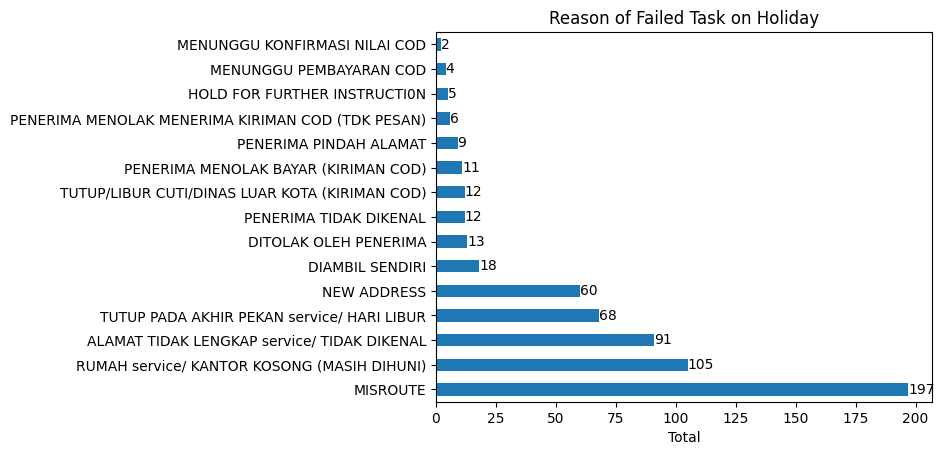

In [25]:
ax = df.loc[(df['UserVar.taskStatusLabel'] == 'Failed') & (df['holiday'] == 'Holiday')].groupby("UserVar.taskDetailStatusLabel").size().reset_index(name='count').sort_values('count', ascending=False).plot.barh('UserVar.taskDetailStatusLabel', 'count', ylabel='', xlabel='Total', title='Reason of Failed Task on Holiday')
ax.legend_.remove()
for c in ax.containers:     
    ax.bar_label(c, label_type='edge')

In [26]:
df['UserVar.weight'] = df['UserVar.weight'].astype(str).astype(float)

In [27]:
for index, row in df.iterrows():
  df['taskDurationMinutes'][index] = int(df['taskDurationMinutes'][index].total_seconds() / 60)

<ipython-input-27-6d85941e9d9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['taskDurationMinutes'][index] = int(df['taskDurationMinutes'][index].total_seconds() / 60)


In [31]:
df_cod = df.copy()
df_cod = df_cod[df_cod['cod.amount'].notna()]

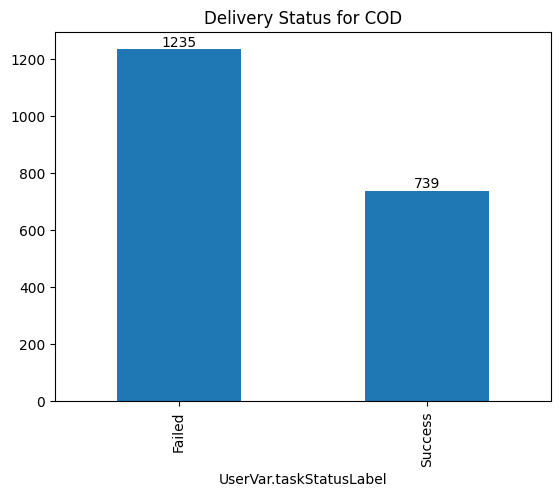

In [57]:
ax = df_cod.groupby('UserVar.taskStatusLabel').size().plot.bar(title='Delivery Status for COD')
for c in ax.containers:     
    ax.bar_label(c, label_type='edge') 

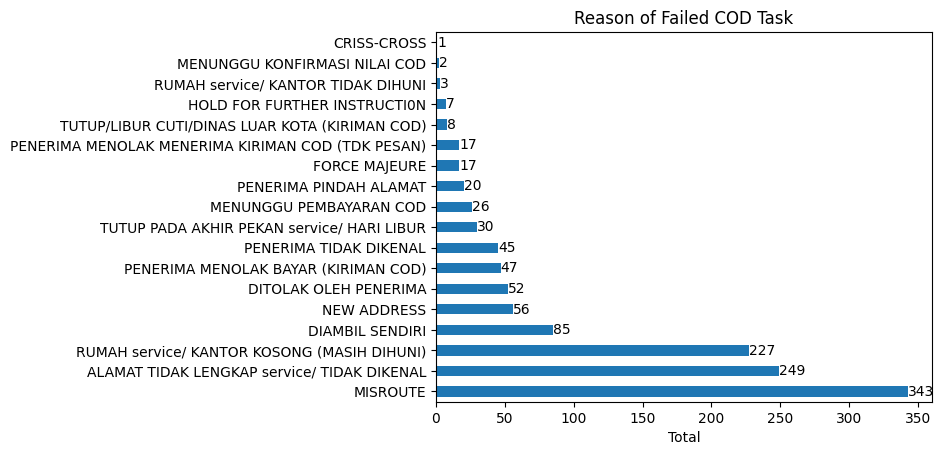

In [34]:
ax = df_cod.loc[df['UserVar.taskStatusLabel'] == 'Failed'].groupby("UserVar.taskDetailStatusLabel").size().reset_index(name='count').sort_values('count', ascending=False).plot.barh('UserVar.taskDetailStatusLabel', 'count', ylabel='', xlabel='Total', title='Reason of Failed COD Task')
ax.legend_.remove()
for c in ax.containers:     
    ax.bar_label(c, label_type='edge')

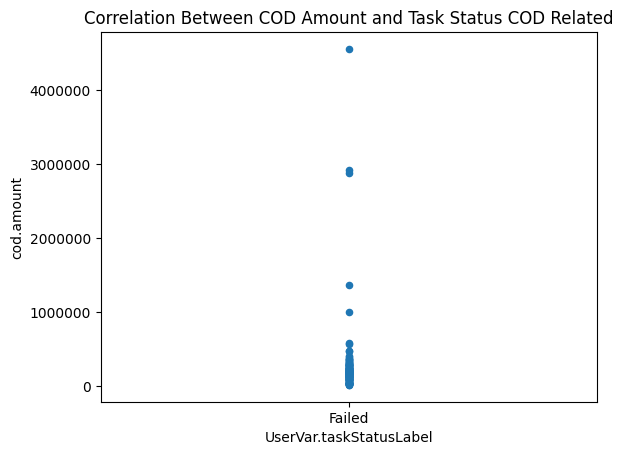

In [67]:
f = plt.figure()
plt.ticklabel_format(style = 'plain')
plt.title('Correlation Between COD Amount and Task Status COD Related', color='black')
df_cod.loc[(df_cod["UserVar.taskDetailStatusLabel"] == 'PENERIMA MENOLAK BAYAR (KIRIMAN COD)') | (df_cod["UserVar.taskDetailStatusLabel"] == 'DITOLAK OLEH PENERIMA') | 
           (df_cod["UserVar.taskDetailStatusLabel"] == 'MENUNGGU PEMBAYARAN COD') | (df_cod["UserVar.taskDetailStatusLabel"] == 'PENERIMA MENOLAK KIRIMAN COD (TDK PESAN)')].plot(kind='scatter', y='cod.amount', x='UserVar.taskStatusLabel',ax=f.gca())
plt.show()

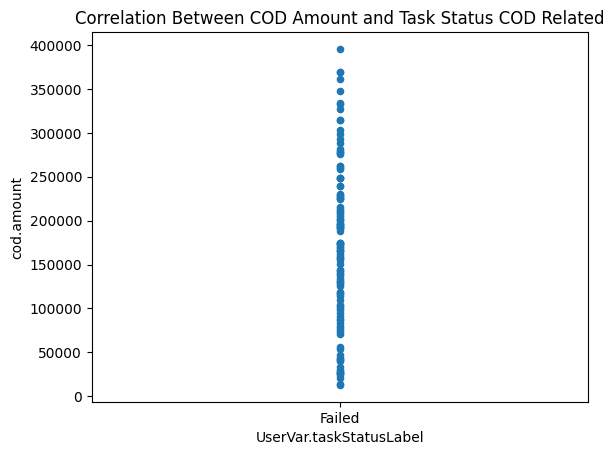

In [69]:
f = plt.figure()
plt.ticklabel_format(style = 'plain')
plt.title('Correlation Between COD Amount and Task Status COD Related', color='black')
df_cod.loc[((df_cod["UserVar.taskDetailStatusLabel"] == 'PENERIMA MENOLAK BAYAR (KIRIMAN COD)') | (df_cod["UserVar.taskDetailStatusLabel"] == 'DITOLAK OLEH PENERIMA') | 
           (df_cod["UserVar.taskDetailStatusLabel"] == 'MENUNGGU PEMBAYARAN COD') | (df_cod["UserVar.taskDetailStatusLabel"] == 'PENERIMA MENOLAK KIRIMAN COD (TDK PESAN)'))
           & (df_cod['cod.amount'] < 400000)].plot(kind='scatter', y='cod.amount', x='UserVar.taskStatusLabel',ax=f.gca())
plt.show()